```
explore using openAI baseline library to solve gym exvironment, including plotting the training results from openAI gym.


Try out at least 3 gym environments, 2 of them should be what you used in your previous homework.


Report the running results and performance differences with your previous implementations and any other observations you have.
you can work in groups of 2
```

In [ ]:
!apt-get update && apt-get install swig cmake
!pip install box2d-py
!pip install "stable-baselines3[extra]>=2.0.0a4"

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,613 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,466 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages 

In [ ]:
import os
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

#Cartpole, Lunar Lander, & FrozenLake
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

#Plotting stuff
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy
from stable_baselines3.common import results_plotter

In [ ]:
# Create log dirs for plotting purposes
log_dir_cart = "/tmp/gym/cart/"
log_dir_lander = "/tmp/gym/lander/"
log_dir_frozen = "/tmp/gym/frozen/"
os.makedirs(log_dir_cart, exist_ok=True)
os.makedirs(log_dir_lander, exist_ok=True)
os.makedirs(log_dir_frozen, exist_ok=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Using functions from https://colab.research.google.com/github/Stable-Baselines-Team/rl-colab-notebooks/blob/sb3/monitor_training.ipynb#scrollTo=mPXYbV39DiCj to show the training scores
#of each agent

def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, "valid")


def plot_results(log_folder, title="Learning Curve"):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), "timesteps")
    y = moving_average(y, window=50)
    # Truncate x
    x = x[len(x) - len(y) :]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Rewards")
    plt.title(title + " Smoothed")
    plt.show()

## Cartpole

In [ ]:
env = gym.make('CartPole-v1')
env = Monitor(env, log_dir_cart)

# Instantiate the agent
model = PPO(
    "MlpPolicy",
    env,
    verbose=1,
    # exploration_final_eps=0.1,
    # target_update_interval=250, # Having this be too short made it stay stuck in low score areas
)
# Train the agent
model.learn(total_timesteps=int(2e5), log_interval=4)

mean_reward, std_reward = evaluate_policy(model, env, deterministic=True)

Using cpu device
Wrapping the env in a DummyVecEnv.
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 44          |
|    ep_rew_mean          | 44          |
| time/                   |             |
|    fps                  | 735         |
|    iterations           | 4           |
|    time_elapsed         | 11          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.009456773 |
|    clip_fraction        | 0.099       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.628      |
|    explained_variance   | 0.241       |
|    learning_rate        | 0.0003      |
|    loss                 | 16.2        |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.0195     |
|    value_loss           | 49.6        |
-----------------------------------------
------------------------------------------
| rollout/             

mean_reward=500.00 +/- 0.0


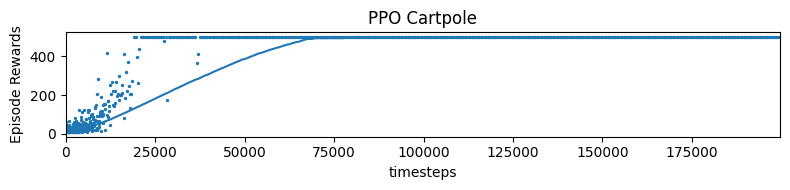

In [ ]:
results_plotter.plot_results(
    [log_dir_cart], 2e5, results_plotter.X_TIMESTEPS, "PPO Cartpole"
)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

### Analysis

I know PPO is particularly suited for shorter term tasks that don't require long term planning, but I don't think any environment shows that better than cartpole.

The speed at which this PPO agent was able to improve and hit the max is beyond any of my other implementations for cartpole that I can remember and the data I can grab from previous homeworks definitely shows a slower growth toward the max.

For comparison we can look at my DQN performance below:

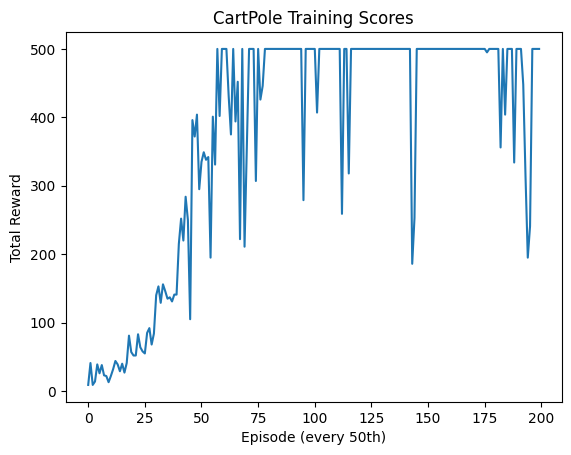

Even at the end where the agent is able to hit max scores it has moments where it dips down and fails. I would guess that the Q-table NN inside my DQN just wasn't big enough for all the forces and angles that it encountered in the environment.

In comparison, the PPO agent is much better at learning and reacting to the different situations it found itself in while training on cartpole, so it wouldn't make the same mistake twice.

## Lunar Lander

In [ ]:
env = gym.make("LunarLander-v3")
env = Monitor(env, log_dir_lander)

# Instantiate the agent
model = PPO(
    "MlpPolicy",
    env,
    verbose=1,
)
# Train the agent
model.learn(total_timesteps=int(4e5))

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, deterministic=True)

Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 89       |
|    ep_rew_mean     | -152     |
| time/              |          |
|    fps             | 823      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 95          |
|    ep_rew_mean          | -164        |
| time/                   |             |
|    fps                  | 709         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007316061 |
|    clip_fraction        | 0.0575      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_varia

mean_reward=129.50 +/- 122.35680470596526


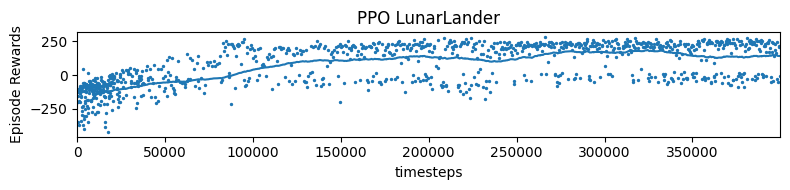

In [ ]:
results_plotter.plot_results(
    [log_dir_lander], 4e5, results_plotter.X_TIMESTEPS, "PPO LunarLander"
)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

### Analysis

I have not run Lunar Lander much on my previous homeworks, but this one seems to have gone well.

Just looking at some of the training results, we can guess at how the agent actually learned over its training.

At the first log given to us we see that the training episodes started out short with a big negative score as the agent kept crashing.\
ep_len_mean : 95 \
ep_rew_mean : -164 \

As a reminder, this is only 2 iterations in after around 4000 timesteps.

Skipping ahead to the log posted at iteration 40 after around 80,000 timesteps: \
ep_len_mean : 517 \
ep_rew_mean : -23.5 \

Here we see that the agent has figured out that staying in the air longer and avoiding crashes gives it a better score! But it still isn't quite adapted to saving fuel. We can see it improve in that respect once we hop ahead to the final log we are given.

At iteration 196, around timestep 400,000 we see that the average reward and episode length are: \
ep_len_mean : 337 \
ep_rew_mean : 138 \

The agent is doing much better and is much faster at landing safely. By cutting down on the time it stays in the air like the last log, it avoids losing points from burning its engines too long. Though it does seem that the agent still manages to crash every so often as we can see in the graph above.

After looking at how the environment is set up in gym, I know that every time the environment is reset, the wind direction and strength changes. My best guess for the dips in performance for the graph near the end is that the agent just can't compensate for the wind enough to avoid a crash.


## Frozen Lake

In [ ]:
# Frozen Lake
env = gym.make("FrozenLake-v1", render_mode="rgb_array")
env = Monitor(env, log_dir_frozen)

# Instantiate the agent
model = PPO(
    "MlpPolicy",
    env,
    verbose=1,
)
# Train the agent
model.learn(total_timesteps=int(4e5))

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)


Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 7.26     |
|    ep_rew_mean     | 0.02     |
| time/              |          |
|    fps             | 746      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 7.85         |
|    ep_rew_mean          | 0.03         |
| time/                   |              |
|    fps                  | 715          |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0103331115 |
|    clip_fraction        | 0.0603       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    e

mean_reward=0.60 +/- 0.4898979485566356


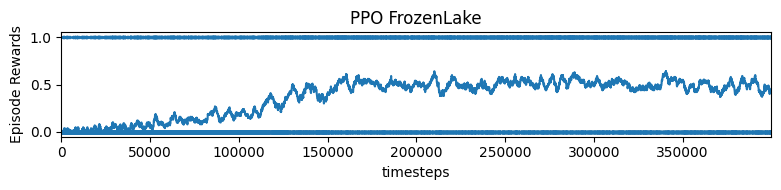

In [ ]:
results_plotter.plot_results(
    [log_dir_frozen], 4e5, results_plotter.X_TIMESTEPS, "PPO FrozenLake"
)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

### Analysis

Looking at this graph, one thing I find interesting is how consistent it is.

At first I thought the middle line was a bunch of connected instances of the agent getting middling scores, but after looking through the documentation I can definitively say that its the average performance over time.

The main thing that interests me here is how it ascends to an average around .5 by 150,000 timesteps, then it stays around there for the rest of the training time.

While it is able to have spikes of good performance, raising the average a bit, it still cannot perfectly win at the FrozenLake game.

While this environment is not the quick decision making environment that PPO excels in, it still does better than my previous attempts at running FrozenLake!

The last time I did with my Q-table/Sarsa Agents, the best performing agents only got an average performance of around .4. As can be seen in the picture below, the averages for most of the agents were even worse as they sat around an average score of 0.1 and lower.

The environment was set up the exact same way as it was for stable baselines, so the only conclusion I can come to was that the fault lies with my older agents. They were probably too random and exploration prone, which made them take longer and lose more games on average before they were trained enough to find the correct path to the win.

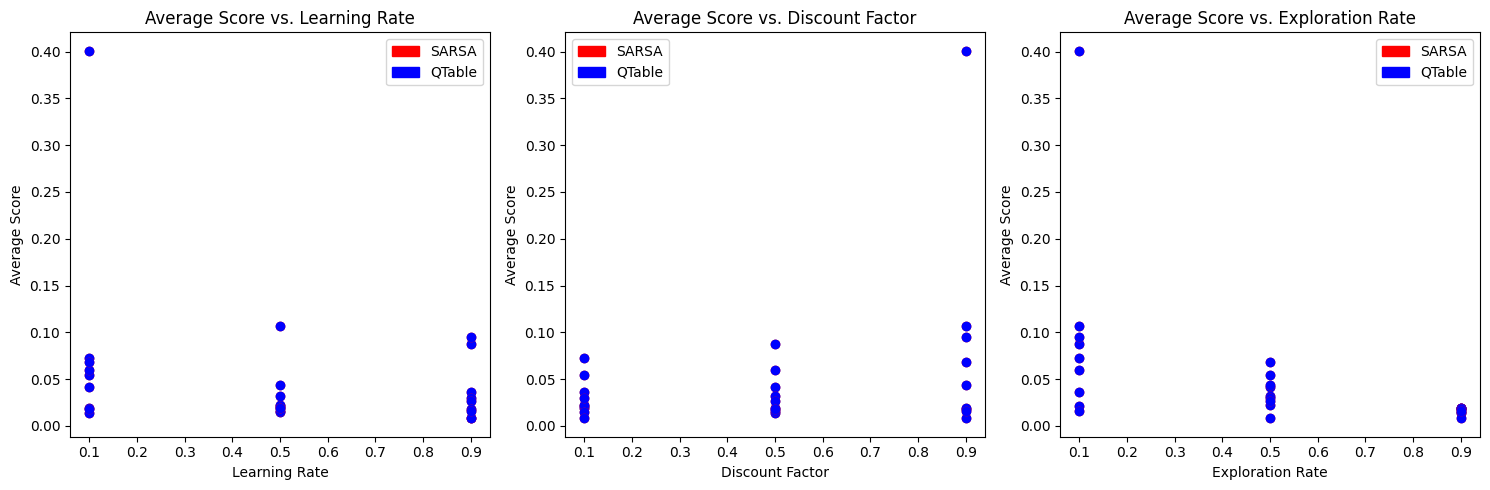

